# IFT 598 Big Data Project - Book Rating Prediction - Yurika Jain

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
sns.set(style = 'darkgrid')
sns.set_palette('deep')

In [3]:
#reading the dataset
path = '/Users/Yuiyu/Documents/BigDataProject/books.csv'
data = pd.read_csv(path, error_bad_lines = False)

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [4]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [5]:
#checking specifications of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 10 columns):
bookID                13714 non-null int64
title                 13714 non-null object
authors               13714 non-null object
average_rating        13714 non-null float64
isbn                  13714 non-null object
isbn13                13714 non-null int64
language_code         13714 non-null object
# num_pages           13714 non-null int64
ratings_count         13714 non-null int64
text_reviews_count    13714 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 1.0+ MB


In [6]:
#checking no. of records
len(data)

13714

In [7]:
#checking for record duplication
data.duplicated().any()

False

# Making an exploratory data analysis

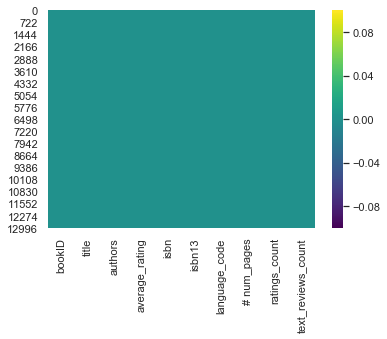

In [8]:
#checking for missing data using heatmap
sns.heatmap(data.isnull(), cmap='viridis')

In [9]:
#As we can from the above heatmap, there are no missing values for any of the columns

Text(0, 0.5, 'Frequency')

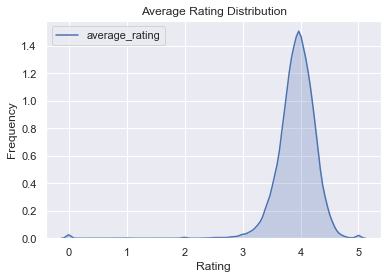

In [10]:
#checking the distribution of average rating
sns.kdeplot(data['average_rating'], shade = True)
plt.title('Average Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

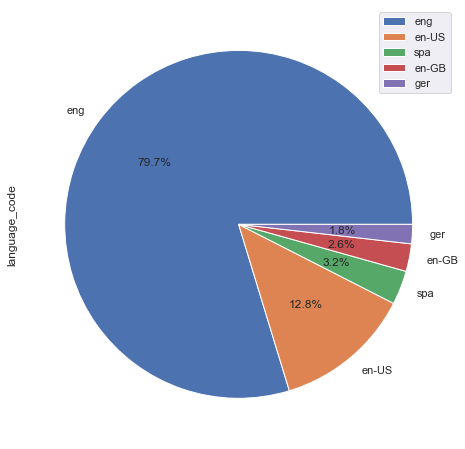

In [11]:
#checking top languages
data['language_code'].value_counts().head(5).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8,8)).legend()

In [12]:
#As we can see from the above piechart, over 95% of books are in English, which means this variable is nearly a constant

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

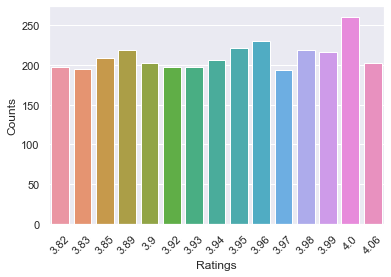

In [13]:
#number of books per rating
sns.barplot(data['average_rating'].value_counts().head(15).index, data['average_rating'].value_counts().head(15))
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.xticks(rotation=45)

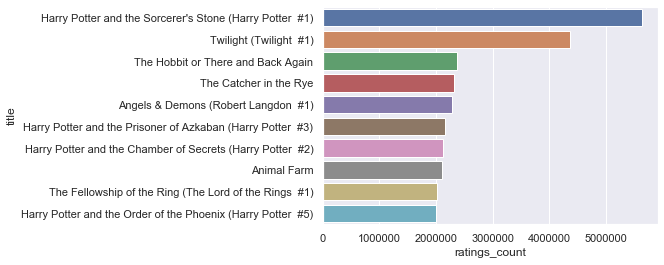

In [14]:
#checking highest rated books
popular_books = data.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
sns.barplot(popular_books, popular_books.index)

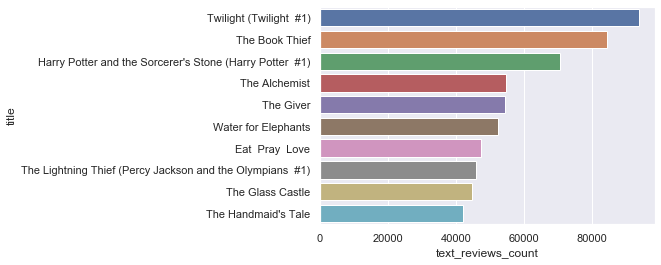

In [15]:
#checking highest reviewed books
highest_reviews = data.nlargest(10, ['text_reviews_count'])
sns.barplot(highest_reviews['text_reviews_count'], highest_reviews['title'])

(array([      0.,  250000.,  500000.,  750000., 1000000., 1250000.,
        1500000., 1750000., 2000000., 2250000.]),
 <a list of 10 Text xticklabel objects>)

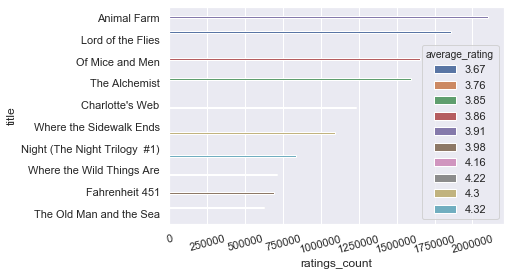

In [16]:
#checking top 10 books under 200 pages for busy book lovers
under200 = data[data['# num_pages'] <= 200]
top10under200 = under200.nlargest(10, ['ratings_count'])
sns.barplot(top10under200['ratings_count'], top10under200['title'], hue=top10under200['average_rating'])
plt.xticks(rotation=15)

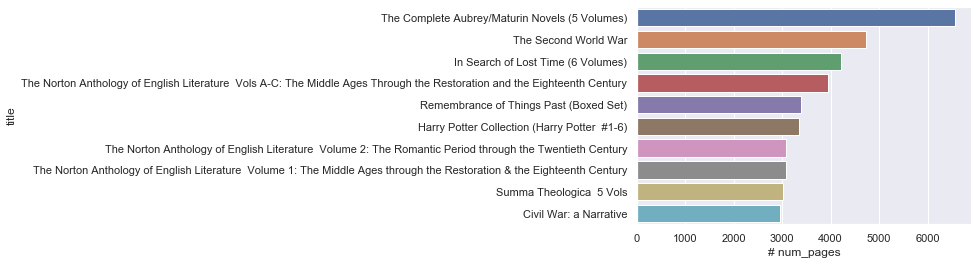

In [17]:
#checking top 10 lengthiest books
longest_books = data.nlargest(10, ['# num_pages']).set_index('title')
sns.barplot(longest_books['# num_pages'], longest_books.index)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

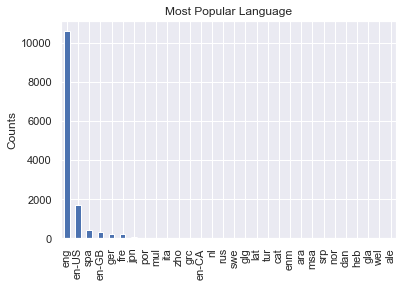

In [18]:
#checking top languages
data['language_code'].value_counts().plot(kind='bar')
plt.title('Most Popular Language')
plt.ylabel('Counts')
plt.xticks(rotation = 90)

Text(0.5, 0, 'Number of Publications')

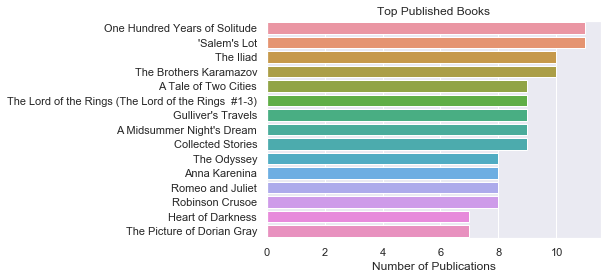

In [19]:
#checking top published books
sns.barplot(data['title'].value_counts()[:15], data['title'].value_counts().index[:15])
plt.title('Top Published Books')
plt.xlabel('Number of Publications')

Text(0.5, 0, 'Total Ratings')

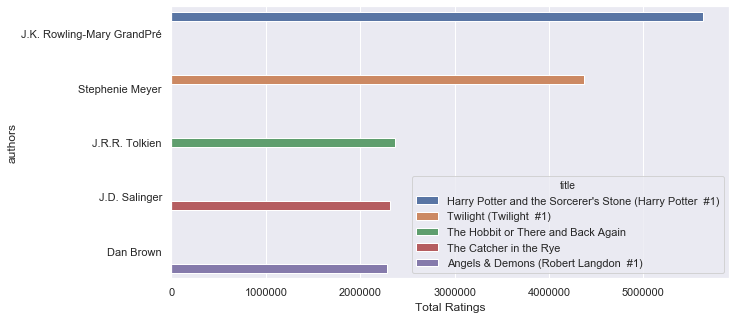

In [20]:
#checking authors with highest rated books
plt.figure(figsize=(10, 5))
authors = data.nlargest(5, ['ratings_count']).set_index('authors')
sns.barplot(authors['ratings_count'], authors.index, ci = None, hue = authors['title'])
plt.xlabel('Total Ratings')

Text(0.5, 0, 'No. of Publications')

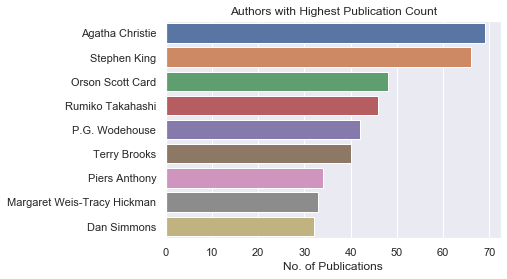

In [21]:
#checking authors with highest publications
top_authors = data['authors'].value_counts().head(9)
sns.barplot(top_authors, top_authors.index)
plt.title('Authors with Highest Publication Count')
plt.xlabel('No. of Publications')

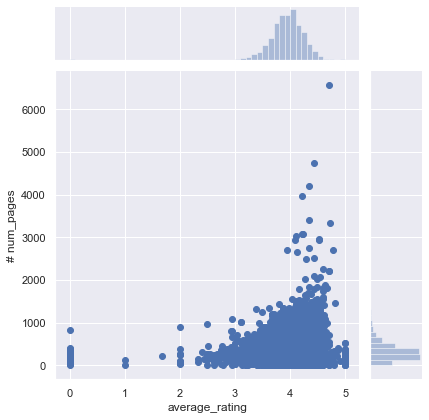

In [22]:
#visualise a bivariate distribution between ratings and no. of pages
sns.jointplot(x = 'average_rating', y = '# num_pages', data = data)

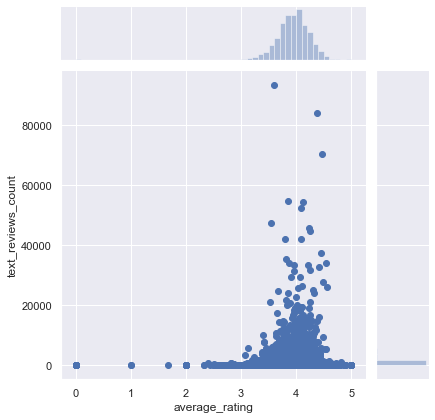

In [23]:
#visualise a bivariate distribution between ratings & no. of text reviews
sns.jointplot(x = 'average_rating', y = 'text_reviews_count', data = data)

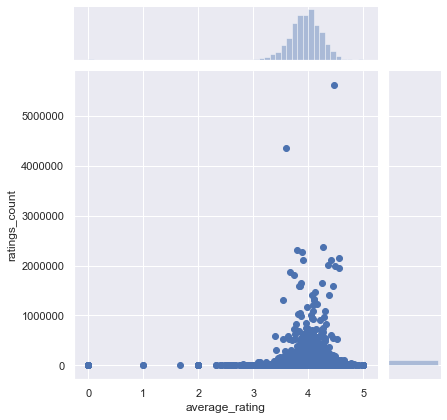

In [24]:
#visualise a bivariate distribution between ratings & no. of ratings
sns.jointplot(x = 'average_rating', y = 'ratings_count', data = data)

# Anomaly Detection
Goal- to remove extreme outliers (i.e.abnormal distance from other values) from features. It will help to gain more accurate model.

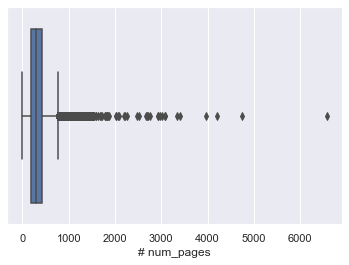

In [25]:
#to find no. of pages outliers
sns.boxplot(x=data['# num_pages'])

In [26]:
#as per above plot, points between 1000 to 6000 are those outliers which are not included in the box  of other observation.

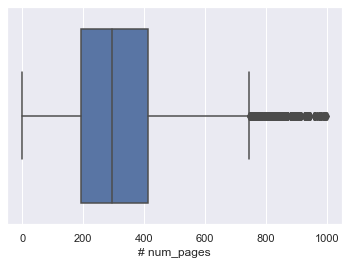

In [27]:
#Removing outliers from no. of pages
data = data.drop(data.index[data['# num_pages'] >= 1000])
sns.boxplot(x=data['# num_pages'])

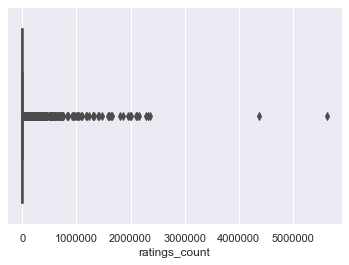

In [28]:
#finding ratings count outliers
sns.boxplot(x=data['ratings_count'])

In [29]:
#above plot shows points between 1000000 to 5000000 are outliers and are needed to be dropped

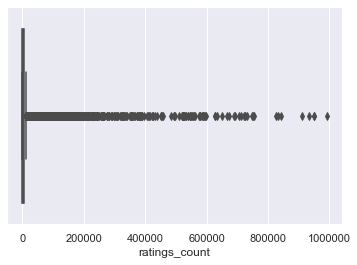

In [30]:
#removing outliers from ratings_count
data = data.drop(data.index[data['ratings_count'] >= 1000000])
sns.boxplot(x=data['ratings_count'])

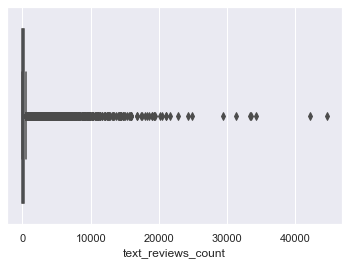

In [31]:
#finding text_reviews_count outliers
sns.boxplot(x=data['text_reviews_count'])

In [32]:
#above plot shows points between 20000 to 40000 are outliers

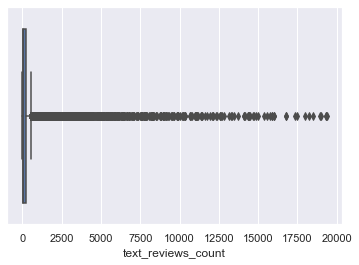

In [33]:
#removing outliers from text_reviews_count
data = data.drop(data.index[data['text_reviews_count'] >= 20000])
sns.boxplot(x=data['text_reviews_count'])

In [34]:
#checking no. of records in dataset after removing outliers
len(data)

13379

# Time to apply Machine Learning model

In [35]:
#importing machine learning libraries
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [36]:
#encoding language column
enc_lang = pd.get_dummies(data['language_code'])
data = pd.concat([data, enc_lang], axis = 1)

In [75]:
#dividing the dataset into attributes and labels
#Will predict on NumberOfPages, CountOfTextReviews, CountOfRatings
X = data.drop(['average_rating','language_code','isbn','isbn13'], axis = 1)
y = data['average_rating']

In [76]:
#splitting the dataset into training set and test set with a ratio of 80:20 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 10)

In [77]:
#encoding title column
le = preprocessing.LabelEncoder()
X_test_title = X_test['title']
X_test['title'] = le.fit_transform(X_test['title'])
X_train['title'] = le.fit_transform(X_train['title'])

C:\Users\Yuiyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Yuiyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [78]:
#encoding title column
X_test_authors = X_test['authors']
X_test['authors'] = le.fit_transform(X_test['authors'])
X_train['authors'] = le.fit_transform(X_train['authors'])

C:\Users\Yuiyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Yuiyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [79]:
#fititng our training features and labels into the machine learning model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
prediction = model.predict(X_test)

In [81]:
#now comparing the actual output values for X_test with the predicted values
ytest = y_test.tolist()
predli = prediction.tolist()
pred = pd.DataFrame({'Title': X_test_title, 'Author' : X_test_authors, 'Actual' : ytest, 'Predicted': predli}).head(25)
pred_10 = pred.head(10)
pred_10

,Title,Author,Actual,Predicted
2991,An Hour Before Daylight: Memories of a Rural B...,Jimmy Carter,3.89,3.905719
13035,Agnes Grey,Anne Brontë,3.68,3.851649
12548,The Age of Extremes: The Short Twentieth Centu...,Eric Hobsbawm,4.24,3.958614
5447,Murder on the Orient Express (Hercule Poirot ...,Agatha Christie,4.16,3.950435
11193,The Big Box,Toni Morrison-Slade Morrison,3.95,3.830811
5841,A First Course in String Theory,Barton Zwiebach,4.18,3.963623
13704,Peace Pact: The Lost World of the American Fou...,David C. Hendrickson,3.30,3.900422
5330,Le pagine della nostra vita,Nicholas Sparks-Lisa Morpurgo,4.08,3.870940
8061,Uncommon Grounds (Maggy Thorsen Mystery #1),Sandra Balzo,3.61,3.886821
1794,Sense and Sensuality: Jesus Talks to Oscar Wil...,Ravi Zacharias,3.93,3.868093


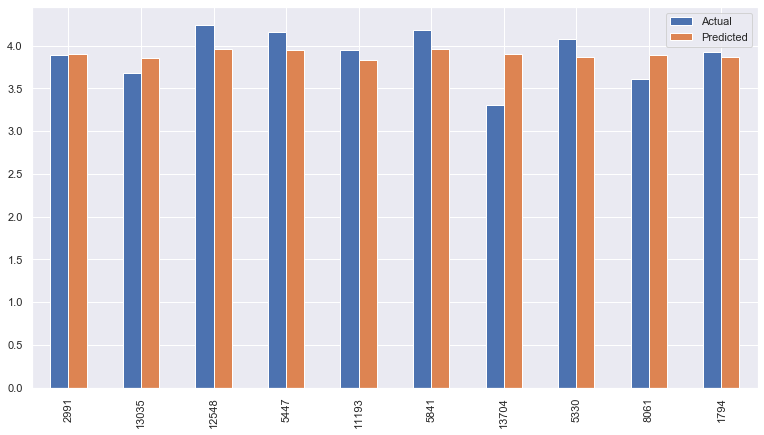

In [82]:
#visualizing the above comparison result
pred_10.plot(kind='bar', figsize=(13,7))

In [83]:
# evaluate the performance of the algorithm
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('r2 Score:', metrics.r2_score(y_test, prediction))

MAE: 0.22401099262056698
MSE: 0.09819795487366509
RMSE: 0.3133655291726662
r2 Score: 0.02437663386424538


In [86]:
#dividing the dataset into attributes and labels
#Will predict on CountOfRatings
X1 = data.drop(['average_rating','text_reviews_count','# num_pages', 'language_code','isbn','isbn13'], axis = 1)
y1= data['average_rating']

In [87]:
#splitting the dataset into training set and test set with a ratio of 80:20 respectively
X_train, X_test, y_train, y_test = train_test_split(X1, y1, train_size = 0.8, test_size = 0.2, random_state = 10)

In [88]:
X_test['title'] = le.fit_transform(X_test['title'])
X_train['title'] = le.fit_transform(X_train['title'])

C:\Users\Yuiyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Yuiyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
X_test['authors'] = le.fit_transform(X_test['authors'])
X_train['authors'] = le.fit_transform(X_train['authors'])

C:\Users\Yuiyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Yuiyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [90]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
prediction1 = model.predict(X_test)

In [92]:
#now comparing the actual output values for X_test with the predicted values
ytest = y_test.tolist()
predli = prediction1.tolist()
pred = pd.DataFrame({'Title': X_test_title, 'Author' : X_test_authors, 'Actual' : ytest, 'Predicted': predli}).head(25)
pred_10 = pred.head(10)
pred_10

,Title,Author,Actual,Predicted
2991,An Hour Before Daylight: Memories of a Rural B...,Jimmy Carter,3.89,3.910476
13035,Agnes Grey,Anne Brontë,3.68,3.877052
12548,The Age of Extremes: The Short Twentieth Centu...,Eric Hobsbawm,4.24,3.883687
5447,Murder on the Orient Express (Hercule Poirot ...,Agatha Christie,4.16,3.962515
11193,The Big Box,Toni Morrison-Slade Morrison,3.95,3.889366
5841,A First Course in String Theory,Barton Zwiebach,4.18,3.902027
13704,Peace Pact: The Lost World of the American Fou...,David C. Hendrickson,3.30,3.878375
5330,Le pagine della nostra vita,Nicholas Sparks-Lisa Morpurgo,4.08,3.912838
8061,Uncommon Grounds (Maggy Thorsen Mystery #1),Sandra Balzo,3.61,3.902408
1794,Sense and Sensuality: Jesus Talks to Oscar Wil...,Ravi Zacharias,3.93,3.917692


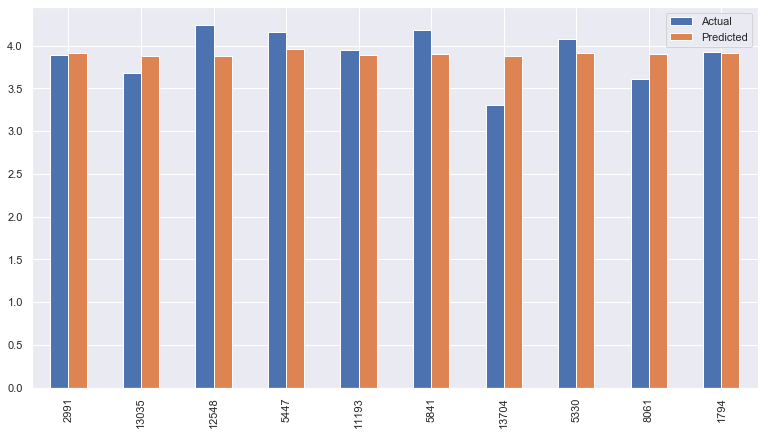

In [93]:
#visualizing the above comparison result
pred_10.plot(kind='bar', figsize=(13,7))

In [94]:
# evaluate the performance of the algorithm
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('r2 Score:', metrics.r2_score(y_test, prediction))

MAE: 0.22401099262056698
MSE: 0.09819795487366509
RMSE: 0.3133655291726662
r2 Score: 0.02437663386424538


In [95]:
#dividing the dataset into attributes and labels
#Will predict on CountOfTextReviews
X2 = data.drop(['average_rating','ratings_count','# num_pages', 'language_code','isbn','isbn13'], axis = 1)
y2= data['average_rating']

In [96]:
#splitting the dataset into training set and test set with a ratio of 80:20 respectively
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size = 0.8, test_size = 0.2, random_state = 10)

In [97]:
X_test['title'] = le.fit_transform(X_test['title'])
X_train['title'] = le.fit_transform(X_train['title'])

C:\Users\Yuiyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Yuiyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [98]:
X_test['authors'] = le.fit_transform(X_test['authors'])
X_train['authors'] = le.fit_transform(X_train['authors'])

C:\Users\Yuiyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Yuiyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [99]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
prediction2 = model.predict(X_test)

In [101]:
#now comparing the actual output values for X_test with the predicted values
ytest = y_test.tolist()
predli = prediction2.tolist()
pred = pd.DataFrame({'Title': X_test_title, 'Author' : X_test_authors, 'Actual' : ytest, 'Predicted': predli}).head(25)
pred_10 = pred.head(10)
pred_10

,Title,Author,Actual,Predicted
2991,An Hour Before Daylight: Memories of a Rural B...,Jimmy Carter,3.89,3.912304
13035,Agnes Grey,Anne Brontë,3.68,3.876317
12548,The Age of Extremes: The Short Twentieth Centu...,Eric Hobsbawm,4.24,3.883133
5447,Murder on the Orient Express (Hercule Poirot ...,Agatha Christie,4.16,3.970598
11193,The Big Box,Toni Morrison-Slade Morrison,3.95,3.889950
5841,A First Course in String Theory,Barton Zwiebach,4.18,3.901798
13704,Peace Pact: The Lost World of the American Fou...,David C. Hendrickson,3.30,3.877572
5330,Le pagine della nostra vita,Nicholas Sparks-Lisa Morpurgo,4.08,3.912997
8061,Uncommon Grounds (Maggy Thorsen Mystery #1),Sandra Balzo,3.61,3.902033
1794,Sense and Sensuality: Jesus Talks to Oscar Wil...,Ravi Zacharias,3.93,3.917657


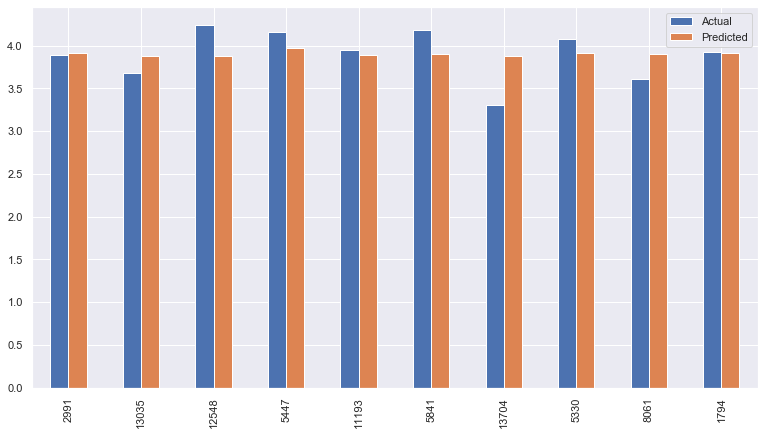

In [102]:
#visualizing the above comparison result
pred_10.plot(kind='bar', figsize=(13,7))

In [103]:
# evaluate the performance of the algorithm
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('r2 Score:', metrics.r2_score(y_test, prediction))

MAE: 0.22401099262056698
MSE: 0.09819795487366509
RMSE: 0.3133655291726662
r2 Score: 0.02437663386424538


In [139]:
#dividing the dataset into attributes and labels
#Will predict on NumberOfPages
X3 = data.drop(['average_rating','ratings_count','text_reviews_count', 'language_code','isbn','isbn13'], axis = 1)
y3 = data['average_rating']

In [140]:
#splitting the dataset into training set and test set with a ratio of 80:20 respectively
X_train, X_test, y_train, y_test = train_test_split(X3, y3, train_size = 0.8, test_size = 0.2, random_state = 10)

In [141]:
X_test['title'] = le.fit_transform(X_test['title'])
X_train['title'] = le.fit_transform(X_train['title'])

C:\Users\Yuiyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Yuiyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [142]:
X_test['authors'] = le.fit_transform(X_test['authors'])
X_train['authors'] = le.fit_transform(X_train['authors'])

C:\Users\Yuiyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Yuiyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [143]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
prediction2 = model.predict(X_test)

In [151]:
#now comparing the actual output values for X_test with the predicted values
ytest = y_test.tolist()
predli = prediction2.tolist()
pred = pd.DataFrame({'Title': X_test_title, 'Author' : X_test_authors, 'Actual' : ytest, 'Predicted': predli}).head(25)
pred_10 = pred.head(10)
pred_10

,Title,Author,Actual,Predicted
2991,An Hour Before Daylight: Memories of a Rural B...,Jimmy Carter,3.89,3.911728
13035,Agnes Grey,Anne Brontë,3.68,3.853041
12548,The Age of Extremes: The Short Twentieth Centu...,Eric Hobsbawm,4.24,3.962188
5447,Murder on the Orient Express (Hercule Poirot ...,Agatha Christie,4.16,3.915264
11193,The Big Box,Toni Morrison-Slade Morrison,3.95,3.832712
5841,A First Course in String Theory,Barton Zwiebach,4.18,3.969859
13704,Peace Pact: The Lost World of the American Fou...,David C. Hendrickson,3.30,3.902445
5330,Le pagine della nostra vita,Nicholas Sparks-Lisa Morpurgo,4.08,3.871373
8061,Uncommon Grounds (Maggy Thorsen Mystery #1),Sandra Balzo,3.61,3.887474
1794,Sense and Sensuality: Jesus Talks to Oscar Wil...,Ravi Zacharias,3.93,3.870205


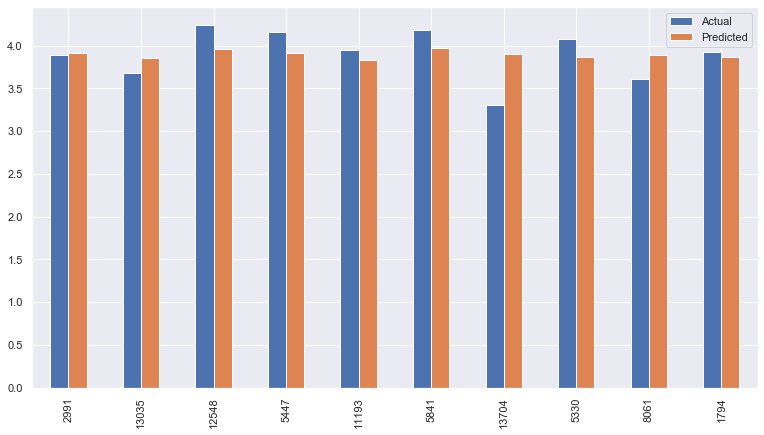

In [152]:
#visualizing the above comparison result
pred_10.plot(kind='bar', figsize=(13,7))

In [153]:
# evaluate the performance of the algorithm
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('r2 Score:', metrics.r2_score(y_test, prediction))

MAE: 0.22401099262056698
MSE: 0.09819795487366509
RMSE: 0.3133655291726662
r2 Score: 0.02437663386424538
